In [1]:
# MOunting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Diabetes Data.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Population Glucose mean: 120.89453125
Sample(25) Glucose mean: 130.36
Population Glucose max : 199
Sample(25) Glucose max : 197


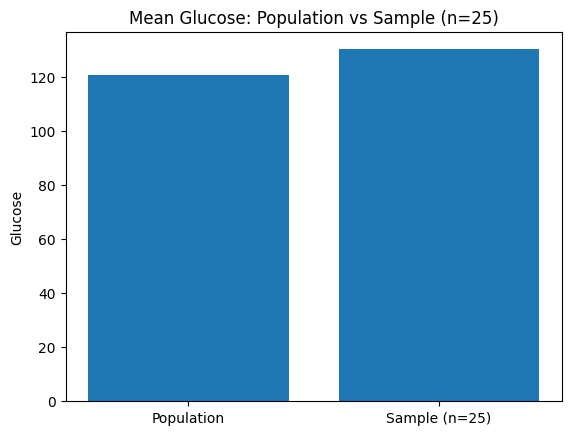

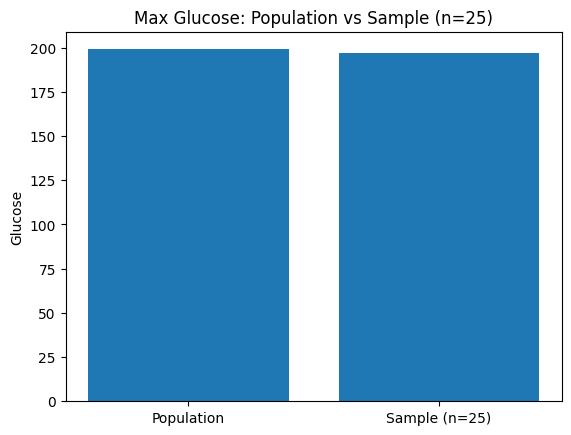

In [4]:
#Part (a)

# Population stats for Glucose
pop_glucose_mean = df['Glucose'].mean()
pop_glucose_max = df['Glucose'].max()

# Sample of 25 (reproducible)
np.random.seed(123)           # fixed seed
sample_25 = df.sample(n=25, random_state=123)

# Sample stats
sample_glucose_mean = sample_25['Glucose'].mean()
sample_glucose_max = sample_25['Glucose'].max()

print("Population Glucose mean:", pop_glucose_mean)
print("Sample(25) Glucose mean:", sample_glucose_mean)
print("Population Glucose max :", pop_glucose_max)
print("Sample(25) Glucose max :", sample_glucose_max)

# Chart 1: Mean Glucose comparison
plt.figure()
labels = ['Population', 'Sample (n=25)']
means = [pop_glucose_mean, sample_glucose_mean]
plt.bar(labels, means)
plt.ylabel("Glucose")
plt.title("Mean Glucose: Population vs Sample (n=25)")
plt.show()

# Chart 2: Max Glucose comparison
plt.figure()
max_vals = [pop_glucose_max, sample_glucose_max]
plt.bar(labels, max_vals)
plt.ylabel("Glucose")
plt.title("Max Glucose: Population vs Sample (n=25)")
plt.show()


Population BMI 98th percentile: 47.52599999999996
Sample(25) BMI 98th percentile: 45.263999999999996


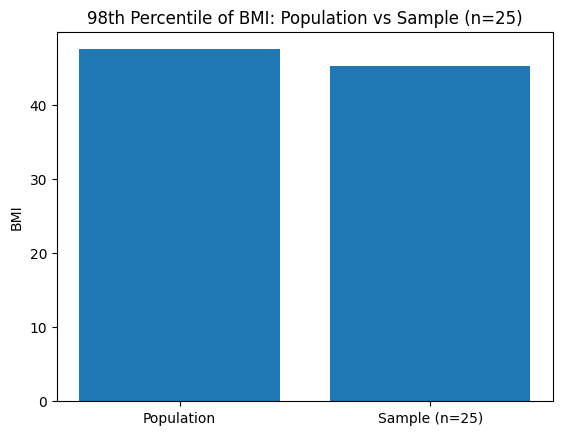

In [5]:
# Part (b)

# Population 98th percentile for BMI
pop_bmi_p98 = np.percentile(df['BMI'], 98)

# Sample 98th percentile for BMI (same sample_25)
sample_bmi_p98 = np.percentile(sample_25['BMI'], 98)

print("Population BMI 98th percentile:", pop_bmi_p98)
print("Sample(25) BMI 98th percentile:", sample_bmi_p98)

# Chart: BMI 98th percentile comparison
plt.figure()
labels = ['Population', 'Sample (n=25)']
p98_vals = [pop_bmi_p98, sample_bmi_p98]
plt.bar(labels, p98_vals)
plt.ylabel("BMI")
plt.title("98th Percentile of BMI: Population vs Sample (n=25)")
plt.show()

In [6]:
# Part (c)

bp = df['BloodPressure']

# True population statistics
pop_bp_mean = bp.mean()
pop_bp_std = bp.std(ddof=1)   # sample std on full population
pop_bp_p98 = np.percentile(bp, 98)

print("Population BloodPressure mean:", pop_bp_mean)
print("Population BloodPressure std :", pop_bp_std)
print("Population BloodPressure 98th percentile:", pop_bp_p98)

# Bootstrap settings
n_boot = 500
sample_size = 150

boot_means = []
boot_stds = []
boot_p98s = []

np.random.seed(123)  # reproducible bootstrap

for i in range(n_boot):
    boot_sample = bp.sample(n=sample_size, replace=True)
    boot_means.append(boot_sample.mean())
    boot_stds.append(boot_sample.std(ddof=1))
    boot_p98s.append(np.percentile(boot_sample, 98))

boot_means = np.array(boot_means)
boot_stds = np.array(boot_stds)
boot_p98s = np.array(boot_p98s)

# Average bootstrap estimates
boot_mean_avg = boot_means.mean()
boot_std_avg = boot_stds.mean()
boot_p98_avg = boot_p98s.mean()

print("\nBootstrap average mean:", boot_mean_avg)
print("Bootstrap average std :", boot_std_avg)
print("Bootstrap average 98th percentile:", boot_p98_avg)


Population BloodPressure mean: 69.10546875
Population BloodPressure std : 19.355807170644777
Population BloodPressure 98th percentile: 99.31999999999994

Bootstrap average mean: 69.15222666666666
Bootstrap average std : 19.192792750902836
Bootstrap average 98th percentile: 98.03292000000003


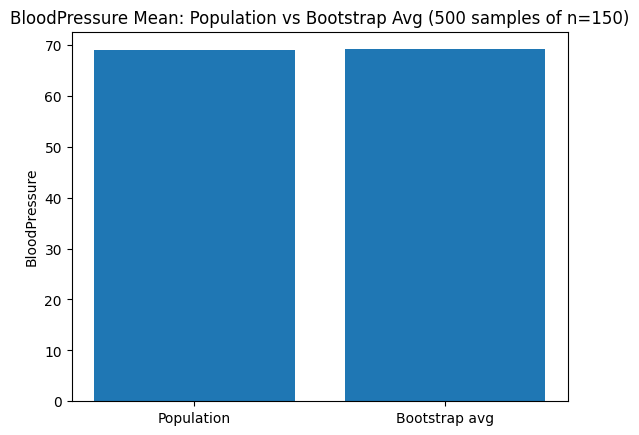

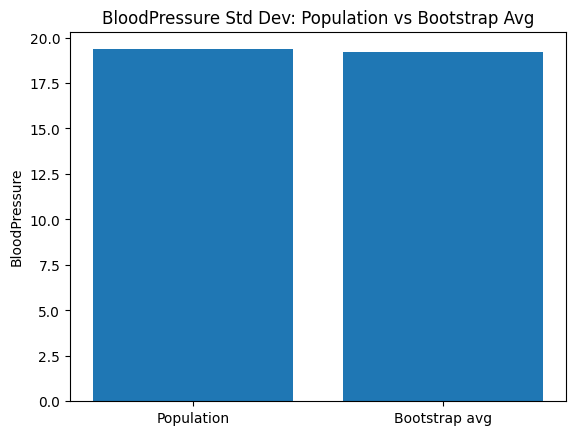

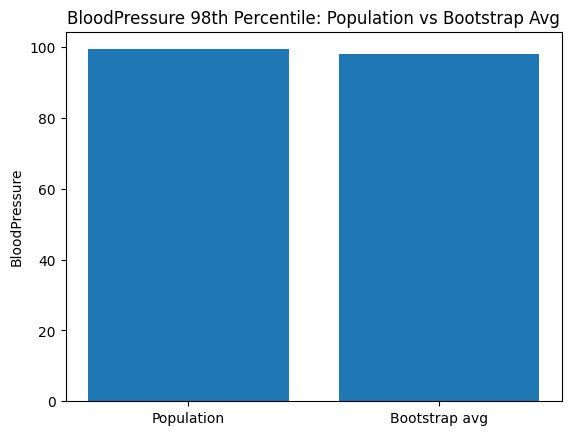

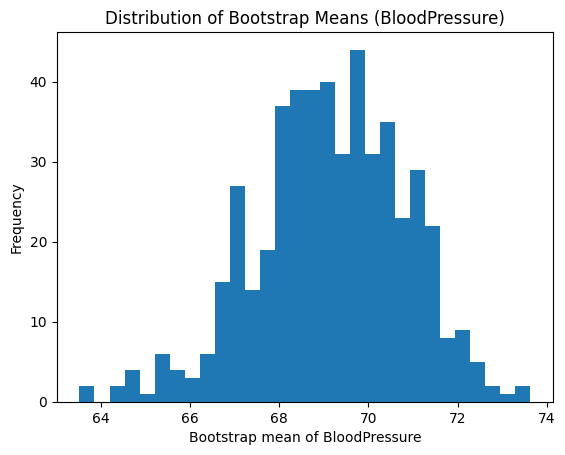

In [7]:
# Chart: Mean comparison
plt.figure()
labels = ['Population', 'Bootstrap avg']
values = [pop_bp_mean, boot_mean_avg]
plt.bar(labels, values)
plt.ylabel("BloodPressure")
plt.title("BloodPressure Mean: Population vs Bootstrap Avg (500 samples of n=150)")
plt.show()

# Chart: Std deviation comparison
plt.figure()
values = [pop_bp_std, boot_std_avg]
plt.bar(labels, values)
plt.ylabel("BloodPressure")
plt.title("BloodPressure Std Dev: Population vs Bootstrap Avg")
plt.show()

# Chart: 98th percentile comparison
plt.figure()
values = [pop_bp_p98, boot_p98_avg]
plt.bar(labels, values)
plt.ylabel("BloodPressure")
plt.title("BloodPressure 98th Percentile: Population vs Bootstrap Avg")
plt.show()

# Optional: show distribution of bootstrap means (nice for report)
plt.figure()
plt.hist(boot_means, bins=30)
plt.xlabel("Bootstrap mean of BloodPressure")
plt.ylabel("Frequency")
plt.title("Distribution of Bootstrap Means (BloodPressure)")
plt.show()
